[github.com/jankoslavic/pypinm](http://github.com/jankoslavic/pypinm), maj 2016

<center>
<img width=300 src="./fig/ladisk.png">
<br>
[izr.prof. dr. Janko Slavič](http://www.ladisk.si/~slavic)
<br><br><br>

<font size="10" color="f00e0e" face="garamond"><b>Numerično reševanje diferencialnih enačb - začetni problem</b></font>

</center>

In [1]:
import numpy as np
from ipywidgets import interact
import matplotlib.pyplot as plt
import seaborn # ta paket lahko odstranite, namenjen je lepšemu izrisu
%matplotlib inline
import sympy as sym
sym.init_printing()

# 1. Uvod

## Sistem navadnih diferencialnih enačb

V okviru numeričnega reševanja *navadnih diferencialnih enačb* z uporabo začetne vrednosti se osredotočamo na reševanje izraza:
$$\mathbf{y}'=\mathbf{f}(t, \mathbf{y}),$$
kjer so podani dodatni (začetni) pogoji:
$$\mathbf{y}(\mathbf{a})=\boldsymbol{\alpha}.$$
Poudariti je treba, da gre zgoraj za vektorski zapis sistema navadnih diferencialnih enačb prvega reda. $\mathbf{y}$ predstavlja vektor spremenljivk, $t$ neodvisno spremenljivko (ni nujno to vedno čas) in $\mathbf{f}$ vektor funkcij. 


## Zapis (ene) diferencialna enačba

Eno diferencialno enačbo prvega reda bi zapisali tako:
$$y'=f(t, y),$$
kjer je podan dodatni pogoj:
$$y(a)=\alpha.$$

Opomba: $f(t, y)$ je znana funkcija in $y'=dy/dx$.

## Preoblikovanje diferencialne enačbe višjega reda v sistem diferencialnih enačb prvega reda

Navadno diferencialno enačbo poljubnega reda:
$$y^{(n)}=f(t, y, y', y'',\dots,y^{(n-1)}),$$
lahko vedno preoblikujemo v sistem diferencialnih enačb prvega reda! 

To naredimo uvedbo novih spremenljivk $y_0, y_1,\dots, y_{n-1}$:
$$\begin{pmatrix}
y_0\\
y_1\\
\vdots\\
y_{n-2}\\
y_{n-1}\\
\end{pmatrix}=
\begin{pmatrix}
y\\
y'\\
\vdots\\
y^{n-2}\\
y^{n-1}\\
\end{pmatrix}.
$$
Zgornji izraz odvajamo po neodvisni spremenljivki $t$:
$$\begin{pmatrix}
y_0'\\
y_1'\\
\vdots\\
y_{n-2}'\\
y_{n-1}'\\
\end{pmatrix}=
\begin{pmatrix}
y'\\
y''\\
\vdots\\
y^{n-1}\\
y^{n}\\
\end{pmatrix}
$$

Sedaj ugotovimo, da velja $y^{(i)}=y_i$ in tudi  $y_n=y^{(n)}=f(t, y_0,\dots, y_{n-1})$. Zapišemo torej: $$
\begin{pmatrix}
y_0'\\
y_1'\\
\vdots\\
y_{n-2}'\\
y_{n-1}'\\
\end{pmatrix}=
\begin{pmatrix}
y_1\\
y_2\\
\vdots\\
y_{n-1}\\
f(t, y_0,\dots, y_{n-1})\\
\end{pmatrix}.
$$


Zgornji izraz lahko zapišemo tudi vektorsko:
$$\mathbf{y}'=\mathbf{f}(t, \mathbf{y}).$$
Če so dodatni pogoji $\mathbf{y}(\mathbf{a})=\boldsymbol{\alpha}$ vsi podani pri isti vrednosti $a_i=a$, potem govorimo o *začetnem*, sicer pa o *robnem problemu*. Tukaj si bomo najprej pogledali *začetni problem*.

### Simbolno reševanje diferencialne enačbe drugega reda

Tukaj si bomo pogledali primer prikazan na sliki, kjer je masa $m$ na klancu naklona $\alpha$. Koeficient trenja je $\mu$, težnostni pospešek pa $g$. Začetna hitrost je $\dot y(0\,\textrm{s})=v_0$, pomik $y(0\,\textrm{s})=0\,\textrm{m}$
<img src="./fig/masa na klancu.png" width=350>
Gibalna enačba (samo za smer $y$) je definirana glede na II. Newtonov zakon (glejte diagram sil na prosto telo).

#### Izpeljava gibalne enačbe

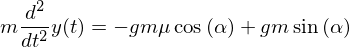

In [2]:
m, mu, g, alpha, y, t, v0 = sym.symbols('m, mu, g, alpha, y, t, v0')
eq = sym.Eq(m*y(t).diff(t,2),  m*g*sym.sin(alpha)-m*g*sym.cos(alpha)*mu)
eq

Rešitev enačbe je:

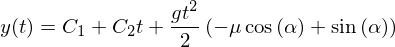

In [3]:
dsol = sym.dsolve(eq, y(t))
dsol

Da določimo $C_1$ in $C_2$ vstavimo $t=0\,\textrm{s}$:

In [4]:
dsol.args[1].subs(t, 0)

nato odvajamo po času in ponovno vstavimo $t=0\,\textrm{s}$:

In [5]:
dsol.args[1].diff(t).subs(t, 0)

Glede na začetne pogoje smo torej določili konstante:

In [6]:
zacetni_pogoji = {'C1': 0, 'C2': v0}

Sledi rešitev:

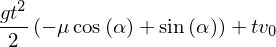

In [7]:
resitev = dsol.args[1].subs(zacetni_pogoji)
resitev

Pripravimo si funkciji za numerični klic:

In [8]:
podatki = {mu: 0.3, alpha: 15*np.pi/180, v0: 1., g: 9.81} #tukaj uporabimo np.pi, da imamo numerično vrednost

pomik = sym.lambdify(t, resitev.subs(podatki), 'numpy')
hitrost = sym.lambdify(t, resitev.diff(t).subs(podatki), 'numpy')

print('Pomik pri 0s: {:g}m'.format(pomik(0)))
print('Hitrost pri 0s: {:g}m/s'.format(hitrost(0)))

Pomik pri 0s: 0m
Hitrost pri 0s: 1m/s


Pripravimo prikaz:

In [9]:
cas = np.linspace(0, 4, 100)
cas2 = np.linspace(0, 4, 5)

In [10]:
def slika():
    plt.plot(cas, pomik(cas), 'b', label='Pomik [m]')
    plt.plot(cas, hitrost(cas), 'r', label='Hitrost [m/s]')
    plt.plot(cas2, pomik(cas2), 'bo', label='Pomik - velik korak[m]')
    plt.plot(cas2, hitrost(cas2), 'ro', label='Hitrost - velik korak [m/s]')
    plt.xlabel('Čas [s]')
    plt.ylabel('Pomik [m] / Hitrost [m/s]')
    plt.legend(loc=(1.01, 0));
    plt.show()

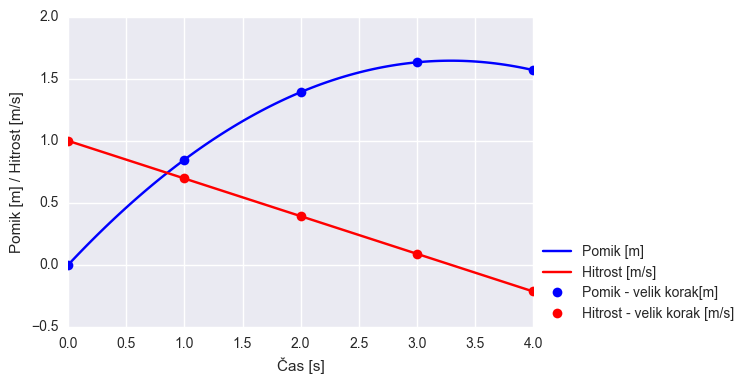

In [11]:
slika()

#### Simbolno preoblikovanje diferencialne enačbe v sistem diferencialnih enačb prvega reda

Spomnimo se izvorne diferencialne enačbe:

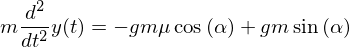

In [12]:
eq

Definirajmo nove spremenljivke in pripravimo funkcijo $f$:

In [13]:
y0, y1 = sym.symbols('y:2')
f = sym.simplify(eq.args[1]/m)
f

Povežimo sedaj nove spremenljivke.

$d y_0/dt$ naj bo enako $y_1$:

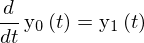

In [14]:
eq1 = sym.Eq(y0(t).diff(t), y1(t))
eq1

Odvod $d y_1/dt$ (v bistvu je to $y''$) naj bo enak funkciji $f$:

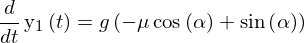

In [15]:
eq2 = sym.Eq(y1(t).diff(t), f)
eq2

Če sedaj zgornje izraze zapišemo v vektorski obliki:
$$\mathbf{y}'=\mathbf{f}(t, \mathbf{y}).$$

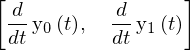

In [16]:
y_odvod = [y0(t).diff(t), y1(t).diff(t)]
y_odvod

In [17]:
f_vec = [y1(t), f]
f_vec

# 2. Numerično reševanje diferencialnih enačb: Eulerjeva metoda

**Eksplicitna Eulerjeva metoda** temelji na preprostem razvoju Taylorjeve vrste:
$$\mathbf{y}(t+h)=\mathbf{y}(t)+\mathbf{y}'(t, \mathbf{y}(t))\,h + 
\mathcal{O}(h^2)$$

Če zanemarimo odvode drugega in višjih redov, potem lahko ob znanih vrednostih $\mathbf{y}(t)$ in odvodu $\mathbf{y}'(t)$ ocenimo vrednosti pri $t+h$. Ko imamo enkrat znane vrednosti pri $t+h$, ponovimo postopek!

Glede na zgornji razvoj Taylorjeve vrste, je napaka Eulerjeve metode na vsakem koraku reda $\mathcal{O}(h^2)$. Ker na intervalu od $x_0$ do $x_n$ tako napako naredimo $n$ krat, je kumulativna napaka $n\,\mathcal{O}(h^2)=\frac{t_n-t_0}{h}\,\mathcal{O}(h^2)=\mathcal{O}(h)$.

Ker ocenjujemo vrednost pri $t+h$ glede na stanje pri $t$ zgornjo metodo štejemo med eksplicitne metode reševanja diferencialnih enačb.

V kolikor bi tudi na desni strani imeli $t+h$, bi govorili o **implicitni Eulerjevi metodi**:
$$\mathbf{y}(t+h)=\mathbf{y}(t)+\mathbf{y}'(t+h,  \mathbf{y}(t+h))\,h + 
\mathcal{O}(h^2).$$
Implicitni pristop je načeloma brezpogojno stabilen, vendar zahteva iskanje ničle nelinearne enačbe.

Opomba: pri eksplicitnem pristopu se pogosto se pridevnik *eksplicitna* izpusti.

## Numerična implementacija

In [18]:
def euler(F, t, y, *args, **kwargs):
    """
    Eulerjeva metoda za reševanje sistema diferencialnih enačb: y' = F(t, y)
    
    :param F:  funkcija, ki jo kličemo s parametroma t in y in vrne seznam 
               vrednosti prvega odvoda
    :param t: časovni vektor
    :param y:  seznam začetnih vrednosti
    :param args: dodatni argumenti funkcije F (brezimenski)
    :param kwargs: dodatni argumenti funkcije F (poimenovani)
    :return Y: vrne np.array ``y`` vrednosti.
    """
    Y = np.zeros((t.shape[0], len(y)))
    Y[0] = y
    h = t[1]-t[0]
    for i, ti in enumerate(t[1:]):
        y += F(ti, y, *args, **kwargs)*h # tukaj je bistvo Eulerjeve metode
        Y[i+1] = y 
    return Y

Spomnimo se sedaj ``f_vec``:

In [19]:
f_vec

Če rešujemo numerično, potem je funkcijo $\mathbf{f}(t, \mathbf{y})$ zapišemo:

In [20]:
pospesek = float((eq.args[1]/m).simplify().subs(podatki))
pospesek #raziščite zakaj smo tukaj tako definirali! namig: type(pospesek)

In [21]:
def F_klada(t, y):
    return np.array([y[1], pospesek],dtype=float)

Preverimo funkcijo pri začetnem času $t=0\,$s in pri začetnih pogoji $[y_0, y_1]=[0, v_0]$:

In [22]:
y_zacetni_pogoji = np.array([0, podatki[v0]])
y_zacetni_pogoji

array([ 0.,  1.])

In [23]:
F_klada(0., y_zacetni_pogoji)

array([ 1.        , -0.30370487])

Uporabimo sedaj Eulerjevo metodo:

In [24]:
#%%timeit
x_Eu = np.linspace(0, 4, 5)
y_Eu = euler(F_klada, x_Eu, np.array([0, 1.]))
y_Eu

array([[ 0.        ,  1.        ],
       [ 1.        ,  0.69629513],
       [ 1.69629513,  0.39259025],
       [ 2.08888538,  0.08888538],
       [ 2.17777075, -0.2148195 ]])

Prikažemo in primerjamo z analitično rešitvijo:

In [25]:
def narisi_euler(n=5):
    x_Eu = np.linspace(0, 4, n)
    y_Eu = euler(F_klada, x_Eu, np.array([0, 1.]))
    plt.title('Eulerjeva metoda s korakom $h={:g}$'.format(x_Eu[1]-x_Eu[0]))
    plt.plot(cas, pomik(cas), 'b', label='Pomik - analitično [m]')
    plt.plot(cas, hitrost(cas), 'r', label='Hitrost - analitično [m/s]')
    plt.plot(x_Eu, y_Eu[:, 0], 'b.', label='Pomik - Euler [m]')
    plt.plot(x_Eu, y_Eu[:, 1], 'r.', label='Hitrost - Euler [m/s]')
    plt.xlabel('Čas [s]')
    plt.ylabel('Pomik [m] / Hitrost [m/s]')
    plt.ylim(-0.5, 2.5)
    plt.legend(loc=(1.01, 0))
    plt.show();

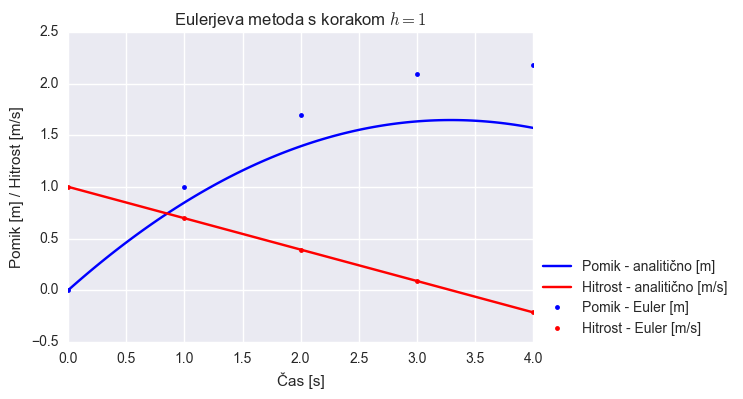

In [26]:
interact(narisi_euler, h=(0.1, 1, 0.1));

# 3. Metoda Runge-Kutta 2. reda

Eulerjeva metoda je prvega reda (prvega reda je namreč globalna napaka $\mathcal{O}(h)$). Če bi želeli izpeljati red napake drugega reda, bi si morali pomagati z razvojem $\mathbf{y}(t+h)$ v Taylorjevo vrsto, kjer bomo zanemarili tretji in višji odvod (lokalna napaka koraka bo tako reda 3, globalna pa reda 2):
$$\mathbf{y}(t+h)=\mathbf{y}(t)+\mathbf{y}'(t)\,h + \frac{1}{2}\mathbf{y}''(t)\,h^2.$$

Uporabimo zamenjavi $\mathbf{y}'(t)=\mathbf{f}(t,\mathbf{y})$ in $\mathbf{y}''(t)=\mathbf{f}'(t,\mathbf{y})$:
$$\mathbf{y}(t+h)=\mathbf{y}(t)+\mathbf{f}(t,\mathbf{y})\,h + \frac{1}{2}\mathbf{f}'(t,\mathbf{y})\,h^2.$$

Ker je vektor $\mathbf{f}(t,\mathbf{y})$ odvisen od neodvisne $t$ in odvisne spremenljivke $\mathbf{y}$, moramo uporabiti pri odvajanju verižno pravilo:
$$\mathbf{f}'(t,\mathbf{y})=\frac{\partial \mathbf{f}}{\partial t}+\sum_i^{n-1}\frac{\partial \mathbf{f}}{\partial y_i}\,\underbrace{\frac{\partial y_i}{\partial t}}_{y_i'}
=\frac{\partial \mathbf{f}}{\partial t}+\sum_i^{n-1}\frac{\partial \mathbf{f}}{\partial y_i}\,{f_i(t, \mathbf{y})},$$
kjer smo indeks $i$ uporabili za zapis posamezne diferencialne enačbe prvega reda $y_i$.

Končno lahko razvoj v Taylorjevo vrsto zapišemo:
$$\mathbf{y}(t+h)_{\textrm{Taylor}}=\mathbf{y}(t)+\mathbf{f}(t,\mathbf{y})\,h + \frac{1}{2}\,{\LARGE(}
\frac{\partial \mathbf{f}}{\partial t}+\sum_i^{n-1}\frac{\partial \mathbf{f}}{\partial y_i}\,{f_i(t, \mathbf{y})}
{\LARGE)}\,h^2.$$

Kakor je razvidno iz zgornjega izraza, potrebujemo dodatne odvode. To predstavlja določeno težavo, ki se ji lahko izognemo na različne načine; v nadaljevanji si bomo pogledali *Runge-Kutta* pristop.

#### Ideja Runge-Kutta pristopa

Zgornjo dilemo metoda *Runge-Kutta* (razvita leta 1901) rešuje z idejo, ki smo jo sicer že srečali pri Gaussovi integraciji: rešitev poskuša najti s pravilno uteženo dodatno vrednostjo funkcije $\mathbf{f}$:

$$\mathbf{y}(t+h)_{\textrm{Runge-Kutta}}=\mathbf{y}(t)+c_0\,\mathbf{f}\left(t,\mathbf{y}\right)\,h +c_1
\underbrace{\mathbf{f}{\large(}t+p\,h,\mathbf{y}+q\,h\,\mathbf{f}(t,\mathbf{y}){\large)}}_{A}\,h.$$

Opomba: če bi v zgornjem izrazu uporabili $c_1=0$, bi izpeljali metodo prvega reda, ker pa uporabimo dodatno vrednost, bomo izpeljali metodo drugega reda. 

Iskanje neznanih konstant $c_0$, $c_1$, $p$, $q$ nadaljujemo z zapisom $A$ v obliki Taylorjeve vrste prvega reda:
$$\mathbf{f}{\large(}t+p\,h,\mathbf{y}+q\,h\,\mathbf{f}(t,\mathbf{y}){\large)}=
\underbrace{
\mathbf{f}{\large(}t,\mathbf{y}{\large)}+
\frac{\partial \mathbf{f}}{\partial t}\,p\,h+
q\,h\,\sum_i^{n-1}\frac{\partial \mathbf{f}}{\partial y_i}\,f_i(t, \mathbf{y})
}_{A}$$

Vstavimo sedaj izpeljani $A$ nazaj v izvorno idejo:
$$\mathbf{y}(t+h)_{\textrm{Runge-Kutta}}=\mathbf{y}(t)+c_0\,\mathbf{f}\left(t,\mathbf{y}\right)\,h +c_1
{\LARGE(}
\mathbf{f}{\large(}t,\mathbf{y}{\large)}+
\frac{\partial \mathbf{f}}{\partial t}\,p\,h+
q\,h\,\sum_i^{n-1}\frac{\partial \mathbf{f}}{\partial y_i}\,f_i(t, \mathbf{y})
{\LARGE)}
\,h.$$

Nadaljujemo z izpeljevanjem in enačbo preoblikujemo, da bo podobna zgoraj izpeljani s Taylorjevo vrsto $\mathbf{y}(t+h)_{\textrm{Taylor}}$:

$$\mathbf{y}(t+h)_{\textrm{Runge-Kutta}}=\mathbf{y}(t)+(c_0+c1)\,\mathbf{f}\left(t,\mathbf{y}\right)\,h +\frac{1}{2}
{\LARGE(}
\frac{\partial \mathbf{f}}{\partial t}\,2\,c_1\,p+
2\,c_1\,q\,\sum_i^{n-1}\frac{\partial \mathbf{f}}{\partial y_i}\,f_i(t, \mathbf{y})
{\LARGE)}
\,h^2.$$


Primerjamo sedaj z zgoraj izpeljanim izrazom:
$$\mathbf{y}(t+h)_{\textrm{Taylor}}=\mathbf{y}(t)+\mathbf{f}(t,\mathbf{y})\,h + \frac{1}{2}\,{\LARGE(}
\frac{\partial \mathbf{f}}{\partial t}+\sum_i^{n-1}\frac{\partial \mathbf{f}}{\partial y_i}\,{f_i(t, \mathbf{y})}
{\LARGE)}\,h^2.$$


In ugotovimo, da za enakost mora veljati:
$$c_0+c_1=1,\qquad 2\,c_1\,p=1,\qquad 2\,c_1\,q=1.$$
Imamo torej tri enačbe in štiri neznanke. Eno od konstant si tako lahko poljubno izmislimo in s tem definiramo ostale tri. Če si na primer izmislimo $c_0=0$, bi to imenovali *spremenjena Eulerjeva metoda* in bi ostali parametri bili: $c_1=1$, $p=q=1/2$. Izbira parametrov nima bistvenega vpliva; Runge-Kutta metodo drugega reda tudi zelo redko uporabljamo; tukaj smo si jo pogledal predvsem zato, da smo spoznali postopek.

# 4. Metoda Runge-Kutta 4. reda

Pri metodi Runge-Kutta 2. reda smo spoznali postopek, ki je v principu enak tudi postopku pri metodi 4.reda. Ker pa je ta postopek tukaj bistveno bolj zahteven, si podrobnosti ne bomo pogledali.

Tudi pri metodi Runge-Kutta 4.reda rešitev na koncu ni popolnoma določena; Runge-Kutta 4. reda tipično definiramo kot:

$$\mathbf{y}(t+h)_{\textrm{Runge-Kutta 4}}=\mathbf{y}(t)+\frac{1}{6}(\mathbf{k}_0+2\,\mathbf{k}_1+2\,\mathbf{k}_2+\mathbf{k}_3),$$
kjer so vektorji konstant:
$$\begin{align}
\mathbf{k}_0&=h\,\mathbf{f}(t,\mathbf{y})\\
\mathbf{k}_1&=h\,\mathbf{f}\left(t+\frac{h}{2},\mathbf{y}+\frac{\mathbf{k}_0}{2}\right)\\
\mathbf{k}_2&=h\,\mathbf{f}\left(t+\frac{h}{2},\mathbf{y}+\frac{\mathbf{k}_1}{2}\right)\\
\mathbf{k}_3&=h\,\mathbf{f}\left(t+h,\mathbf{y}+\mathbf{k}_2\right)
\end{align}
$$

## Numerična implementacija

In [27]:
def runge_kutta_4(F, t, y, *args, **kwargs):
    """
    Metoda Runge-Kutta 4. reda za reševanje sistema diferencialnih enačb: y' = F(t, y)
    
    :param F:  funkcija, ki jo kličemo s parametroma t in y in vrne seznam 
               vrednosti prvega odvoda
    :param t: časovni vektor
    :param y:  seznam začetnih vrednosti
    :param args: dodatni argumenti funkcije F (brezimenski)
    :param kwargs: dodatni argumenti funkcije F (poimenovani)
    :return Y: vrne np.array ``y`` vrednosti.
    """
    def RK4(F, t, y, *args, **kwargs):
        k0 = h*F(t, y, *args, **kwargs)
        k1 = h*F(t + h/2.0, y + k0/2.0, *args, **kwargs)
        k2 = h*F(t + h/2.0, y + k1/2.0, *args, **kwargs)
        k3 = h*F(t + h, y + k2, *args, **kwargs)
        return (k0 + 2.0*k1 + 2.0*k2 + k3)/6.0
    
    Y = np.zeros((t.shape[0], len(y)))
    Y[0] = y
    h = t[1]-t[0]

    for i, ti in enumerate(t[1:]):
        y += RK4(F, ti, y, *args, **kwargs)
        Y[i+1] = y 
        
    return Y

In [28]:
#%%timeit
x_RK4 = np.linspace(0, 4, 5)
y_RK4 = runge_kutta_4(F_klada, x_RK4,  np.array([0, 1.]))

In [29]:
pomik(x_RK4)-y_RK4[:, 0]

array([  0.00000000e+00,  -3.33066907e-16,  -1.77635684e-15,
        -3.99680289e-15,  -7.10542736e-15])

In [30]:
def narisi_rk4(n=5, izrisi_euler=False):
    x_RK4 = np.linspace(0, 4, n)
    y_RK4 = runge_kutta_4(F_klada, x_RK4,  np.array([0, 1.]))
    plt.title('Runge-Kutta 4.reda s korakom $h={:g}$'.format(x_RK4[1]-x_RK4[0]))
    plt.plot(cas, pomik(cas), 'b', label='Pomik - analitično [m]')
    plt.plot(cas, hitrost(cas), 'r', label='Hitrost - analitično [m/s]')
    if izrisi_euler:
        x_Eu = np.linspace(0, 4, n)
        y_Eu = euler(F_klada, x_Eu, np.array([0, 1.]))        
        plt.plot(x_Eu, y_Eu[:, 0], 'b.', label='Pomik - Euler [m]')
        plt.plot(x_Eu, y_Eu[:, 1], 'r.', label='Hitrost - Euler [m/s]')
    plt.plot(x_RK4, y_RK4[:, 0], 'bo', label='Pomik - RK4 [m]')
    plt.plot(x_RK4, y_RK4[:, 1], 'ro', label='Hitrost - RK4 [m/s]') 
    plt.plot(x_RK4, 1e14*np.abs(pomik(x_RK4)-y_RK4[:, 0]), 'k.', label='Napaka pomika $\\times 10^{14}$')
    plt.xlabel('Čas [s]')
    plt.ylabel('Pomik [m] / Hitrost [m/s]')
    plt.ylim(-0.5, 2.5)
    plt.legend(loc=(1.01, 0))
    plt.show();

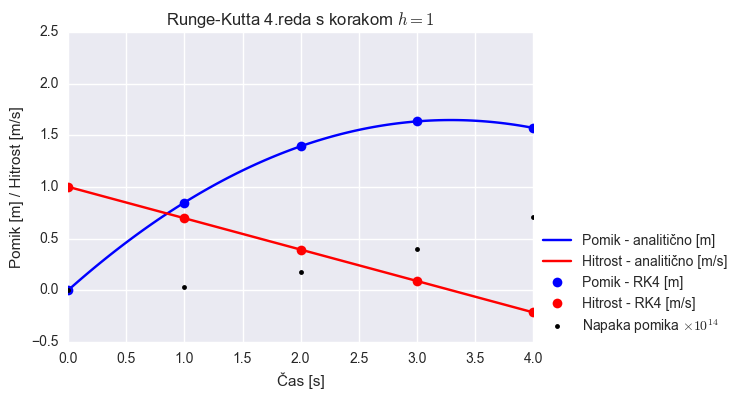

In [31]:
interact(narisi_rk4);

# 5. Uporaba ``scipy.integrate.ode``

Scipy ima v okviru ``scipy.integrate.ode`` implementiranih več različnih algoritmov za reševanje diferencialnih enačb. Tukaj si bomo podrobneje pogledali najprej različico metode *Runge-Kutta* 4(5) reda. Gre za tako imenovano Dormand–Prince metodo (oznaka ``dopri5``), ki izračuna korak z redom natančnosti 4 in 5 ter razliko uporabi za oceno napake metode 4. reda; napako potem izkoristi za prilagajanje velikosti koraka. Ta metoda je med najpogosteje uporabljenimi. Nekaj več informacij najdete tukaj: http://en.wikipedia.org/wiki/Dormand%E2%80%93Prince_method.

In [32]:
from scipy.integrate import ode, odeint

Tipična uporaba je taka (zanima nas integral, ne nujno tudi vmesne vrednosti):

In [33]:
t1 = 4
solver = ode(F_klada).set_integrator('dopri5').set_initial_value(y_zacetni_pogoji)
resitev = solver.integrate(t1)
resitev

array([ 1.57036101, -0.2148195 ])

**`ode` vs `odeint`**

`scipy.integrate.ode` omogoča izbiro različnih integratorjev (metod); zelo preprosta za uporabo pa je sicer funkcija  `scipy.integrate.odeint`, ki pa temelji na *lsoda* algoritmu (glejte help). 

`odeint` pričakuje najprej odvisne spremenljivke, nato neodvisne in je treba funkcijo prvih odvodov ustrezno definirati:

In [34]:
def F_klada_2(y, t):#odeint pričakuje najprej odvisne spremenljivke, nato neodvisne
    return F_klada(t, y)

In [35]:
cas2 = cas[::5] #bolj 'redek' čas, da se bo videlo numerično napako

In [36]:
resitev2 = odeint(F_klada_2, y_zacetni_pogoji, cas2)

In [37]:
resitev2[:5]

array([[ 0.        ,  1.        ],
       [ 0.19582278,  0.93864548],
       [ 0.3792507 ,  0.87729096],
       [ 0.55028377,  0.81593644],
       [ 0.70892199,  0.75458192]])

In [38]:
def slika():
    plt.plot(cas, pomik(cas), 'b', label='Pomik - analitično [m]')
    plt.plot(cas, hitrost(cas), 'r', label='Hitrost - analitično [m/s]')
    plt.plot(cas2, resitev2[:, 0], 'b.', label='Pomik - odeint [m]')
    plt.plot(cas2, resitev2[:, 1], 'r.', label='Hitrost - odeint [m/s]')
    plt.xlabel('Čas [s]')
    plt.ylabel('Pomik [m] / Hitrost [m/s]')
    plt.legend(loc=(1.01, 0));
    plt.show()

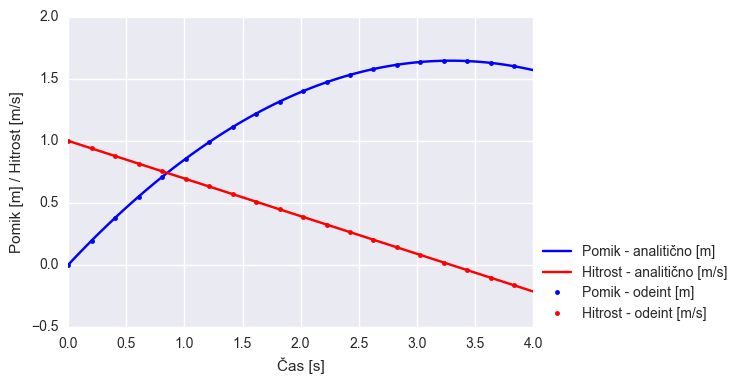

In [39]:
slika()

# 6. Stabilnost reševanja diferencialnih enačb*

Preprosto povedano, je reševanje diferencialne enačbe stabilno, če se lokalne napake ne seštevajo v globalno napako, ki preraste vse meje. Globalna napaka torej mora ostati omejena. Stabilnost je pogojena z diferencialno enačbo, z uporabljeno numerično metodo in s korakom integracije $h$.

V nadaljevanju si bomo na primerih pogledali nekatere detajle.

## Primer preprostega nihala

Poglejmo si najprej primer reševanja diferencialne enačbe preprostega nihala. Slika (vir: Slavič, Dinamika, mehanska nihanja in mehanika tekočin, 2014):
<img src="./fig/Slavič - slika 3.6.png" width=150>
prikazuje dinamski sistem (masa $m$, togost $k$) katerega diferencialna enačba je
$$m\,\ddot x + k\,x=0.$$

Tako diferencialno enačbo preoblikujemo v standardno obliko lastnega nihanja:
$$\ddot x + \omega_0^2\,x=0,$$
kjer je lastna krožna frekvenca:
$$\omega_0=\sqrt{\frac{k}{m}}$$
in pričakujemo odziv oblike:
$$x(t)=A\,\cos(\omega_0\,t)+B\,\sin(\omega_0\,t)$$

Če so začetni pogoji enaki: $x(0\,\textrm{s})=x_0$ in $\dot x(0\,\textrm{s})=0\,\textrm{m/s}$, potem odziv pričakujemo v obliki:
$$x(t)=x_0\,\cos(\omega_0\,t)$$

#### Numerični primer

Najprej definirajmo vektor začetnih pogojev in funkcijo prvih odvodov (diferencialno enačbo drugega reda pretvorimo v sistem diferencialnih enačb prvega reda $\mathbf{y}'=\mathbf{f}(x, \mathbf{y})$)

In [40]:
def F_nihalo(t, y, omega0=2*np.pi):
    """
    Funkcija prvih odvodov za nihalo z eno prostostno stopnjo
    
    :param t: čas
    :param y: seznam začetnih vrednosti
    :param omega: lastna krožna frekvenca
    :return y': seznam vrednosti odvodov
    """
    return np.array([y[1], -omega0**2*y[0]])

Podatki, analitična rešitev, Eulerjeva metoda in metoda Runge-Kutta 4. reda:

In [41]:
x0 = 1.
omega0 = 2*np.pi
x_zacetni_pogoji = np.array([x0, 0.])
dt = 0.5
t1 = 4.

cas = np.linspace(0, t1, 500)
pomik = x0*np.cos(omega0*cas) # analitična rešitev
hitrost = -x0*omega0*np.sin(omega0*cas) # analitična rešitev
t_Eu, x_Eu = euler(F_nihalo, 0, x_zacetni_pogoji, t_stop=t1, h=dt)
t_RK4, x_RK4 = runge_kutta_4(F_nihalo, 0, x_zacetni_pogoji, t_stop=t1, h=dt)

AttributeError: 'int' object has no attribute 'shape'

Rešitev po RK45 metodi:

In [ ]:
#%%timeit -n 1
solver = ode(F_nihalo).set_integrator('dopri5').set_initial_value(x_zacetni_pogoji)
solver.set_f_params(omega0)
t_RK4_sci = [0]
x_RK4_sci = [x_zacetni_pogoji]
while solver.successful() and solver.t < t1:
    solver.integrate(solver.t+dt)
    t_RK4_sci.append(solver.t)
    x_RK4_sci.append(solver.y)
t_RK4_sci = np.array(t_RK4_sci)
x_RK4_sci = np.array(x_RK4_sci)

Rešitev po implicitni metodi tipa Adams:

In [ ]:
#%%timeit -n 1
solver = ode(F_nihalo).set_integrator('lsoda').set_initial_value(x_zacetni_pogoji)
solver.set_f_params(omega0)
t_imp_sci = [0]
x_imp_sci = [x_zacetni_pogoji]
while solver.successful() and solver.t < t1:
    solver.integrate(solver.t+dt)
    t_imp_sci.append(solver.t)
    x_imp_sci.append(solver.y)
t_imp_sci = np.array(t_imp_sci)
x_imp_sci = np.array(x_imp_sci)

In [ ]:
plt.plot(cas, pomik, 'r', label='Pomik - analitično [m]')
#plt.plot(t_Eu[:7], x_Eu[:7, 0], 'ro', label='Pomik - Euler [m] - začetek')
#plt.plot(t_Eu, x_Eu[:, 0], 'bx', label='Pomik - Euler [m]')
#plt.plot(t_RK4, x_RK4[:, 0], 'ro', label='Pomik - RK4 [m]')
plt.plot(t_RK4_sci, x_RK4_sci[:, 0], 'bo', label='Pomik - RK4 sci [m]')
plt.plot(t_imp_sci, x_imp_sci[:, 0], 'g.', label='Pomik - Imp sci [m]')
plt.xlabel('Čas [s]')
plt.legend(loc=(1.01, 0));

#### Zakaj je Eulerjeva metoda tako nestabilna?

In [ ]:
x_Eu[:10,0]

Spomnimo se temeljnega izraza Eulerjeve metode:
$$y(t+h)=y(t)+y'(t)\,h.$$

Sedaj razumemo, da v prvi točki ($y'(0)=0$) naredimo relativno veliko napako, vendar zakaj potem začne vrednost alternirajoče naraščati?

Spomnimo se, da je analitična rešitev $y(t)=y_0=x(t)=x_0\,\cos(\omega_0\,t)$ in je torej $y'(t)=y_1=\dot x(t)=-\omega_0\,x_0\,\sin(\omega_0\,t)$. Vstavimo pripravljena izraza v Eulerjevo metodo in uredimo:
$$y(t+h)=y(t)+y'(t)\,h=x_0\,\left(\cos(\omega_0\,t)-\omega_0\,h\,\sin(\omega_0\,t)\right)$$

Predpostavimo, da gledamo stanje ob takem času $t$, da velja $\cos(\omega_0\,t)=0$ in $\sin(\omega_0\,t)=1$:
$$y(t+h)=x_0\,\underbrace{\left(-\omega_0\,h\right)}_{A}.$$
V kolikor bo absolutna vrednost izraza $A$ večja kot 1, bo pri času $t+h$ vrednost večja kot v predhodnem koraku in v sledečem verjetno spet. Sledi, da lahko pride do nestabilnosti. Da se je izognemo, mora veljati:
$$|A|<1\qquad\rightarrow\qquad h<\frac{1}{\omega_0}$$

Opomba: v nekaterih knjigah boste videli tudi vrednost $h<2/\omega_0$; enoliče meje za vse diferencialne enačbe ni mogoče definirati; v splošnem pa velja, da je korak definiran relativno glede na najkrajšo periodo $T$ v diferencialni enačbi (npr.: $h<2/\omega_0$ je v bistvu enako $h<2/(2\pi/T)$ oziroma $h<T/\pi$). Perioda $T$ je definirana glede na najvišjo lastno frekvenco sistema $T=1/f_{\textrm{max}}$, ki jo izračunamo iz lastne vrednosti sistema.

Kakor je prikazano zgoraj imajo naprednejše metode reševanje diferencialnih enačb (npr. Dormand in Prince Runge-Kutta metoda) vgrajen adaptiven časovni korak, ki ponavadi zagotavlja stabilno rešitev. Implicitne metode so načeloma bolj stabilne, vendar pa je cena večja numerična zahtevnost.

## Primer Van der Polovega nihala

http://en.wikipedia.org/wiki/Van_der_Pol_oscillator

Definirajmo seznam odvodov:

In [ ]:
def F_van_der_pol(t, y, mu=1000):
    """
    Funkcija prvih odvodov za Van der Pol nihalo
    
    :param t: čas
    :param y: seznam začetnih vrednosti
    :param mu: parameter dušenja in nelinearnosti
    :return y': seznam vrednosti odvodov
    """
    return np.array([y[1], mu*(1-y[0]**2)*y[1]-y[0]])

In [ ]:
x_zacetni_pogoji = np.array([1.5, 0.])
dt = 0.1
t1 = 3000

Rešitev po RK45 metodi:

In [ ]:
#%%timeit -n 1
solver = ode(F_van_der_pol).set_integrator('dopri5').set_initial_value(x_zacetni_pogoji)
t_RK4_sci = [0]
x_RK4_sci = [x_zacetni_pogoji]
while solver.successful() and solver.t < t1/6:# računamo samo do 1/6 časa!!!
    solver.integrate(solver.t+dt)
    t_RK4_sci.append(solver.t)
    x_RK4_sci.append(solver.y)
t_RK4_sci = np.array(t_RK4_sci)
x_RK4_sci = np.array(x_RK4_sci)

Rešitev po implicitni metodi tipa Adams

In [ ]:
#%%timeit -n 1
solver = ode(F_van_der_pol).set_integrator('lsoda').set_initial_value(x_zacetni_pogoji)
t_imp_sci = [0]
x_imp_sci = [x_zacetni_pogoji]
while solver.successful() and solver.t < t1:
    solver.integrate(solver.t+dt)
    t_imp_sci.append(solver.t)
    x_imp_sci.append(solver.y)
t_imp_sci = np.array(t_imp_sci)
x_imp_sci = np.array(x_imp_sci)
solver.successful()

Rešitev s pomočjo funkcije ``odeint`` (uporablja isto implicitno metodo `lsoda` kakor zgoraj, poleg moramo definirati pri katerih časovnih korakih nas zanima rešitev).

In [ ]:
def F_van_der_pol_2(y, t):#odeint pričakuje najprej odvisne spremenljivke, nato neodvisne
    return F_van_der_pol(t, y, mu=1000)

In [ ]:
#%%timeit -n 1
time = dt*np.arange(t1/dt)
result = odeint(F_van_der_pol_2, x_zacetni_pogoji, time)

Prikaz rezultatov

In [ ]:
plt.plot(t_RK4_sci, x_RK4_sci[:, 0], 'b.', label='Pomik - RK4 sci [m]')
plt.plot(t_imp_sci, x_imp_sci[:, 0], 'g-', label='Pomik - Imp sci [m]')
plt.plot(time, result[:, 0], 'y-', label='Pomik - odeint sci [m]')
plt.xlabel('Čas [s]')
plt.legend(loc=(1.01, 0));

# Do naslednjih vaj preštudirajte sledeče:

1. Na sliki (vir: Numerical Methods in Engineering With Python 3, 3rd Ed, Jaan Kiusalaas) je prikazan izstrelek mase $m$, ki ga izstrelimo s hitrosjo $v_0$ pod kotom $\alpha$. Če je sila upora zraka: $F=c\,v^{3/2}$, potem sta gibalni enačbi:
$$\ddot x(t)=-F\,\cos(\alpha)/m\qquad\ddot y(t)=-F\,\sin(\alpha)/m-g.$$
Opomba: $v=\sqrt{\dot x^2+\dot y^2}.$ Ustrezne parametre si izmislite.
<img src="./fig/Jaan Kiusalaas stran 265 n13.png" width=300>
Sistem dveh diferencialnih enačb drugega reda zapišite v sistem diferencialnih enačb prvega reda.
* Določite vektor začetnih pogojev, ki smo ga zgoraj označili z $\mathbf{y}$.
* Določite funkcijo prvih odvodov, ``c`` naj bo parameter.
* Definirajte začetne pogoje in rešite nalogo s poljubnimi podatki.
* Prikažite $(x, y)$ lego masne točke, spreminjajte koeficient upora $c$.
* Prikažite hitrost v odvisnosti od časa. Določite minimum hitrosti in čas pri katerem nastane.
* Na vaje prinesite poljubno diferencialno enačbo in bodite pripravljeni na numerično reševanje!

Delno rešene vaje se nahajajo [tukaj](./vaje/Vaja 12 - polovica.ipynb).